In [39]:
import json
from matplotlib import pyplot as plt
import numpy as np
from model import Narx, DEVICE
from data import load_narx_data, load_data
from util_fun import narx_sim_nrms
import torch

In [42]:
pred_model=Narx(3+15,100,1).to(DEVICE)
sim_model=Narx(15+25,50,5).to(DEVICE)

In [43]:
pred_model.load_state_dict(torch.load(r'D:\Documents\TUe\MSC_AI-ES\5SC28-ML for Systems and Control\Project\narx15K_na3_nb15_nlay1_nnode100_pred'))
sim_model.load_state_dict(torch.load(r'D:\Documents\TUe\MSC_AI-ES\5SC28-ML for Systems and Control\Project\narx15K_na15_nb25_nlay5_nnode50_sim'))

<All keys matched successfully>

In [58]:
x, y=load_narx_data(3,15)
x_data, y_data=load_data()


In [59]:
x_data=x_data.to(DEVICE)
y_data=y_data.to(DEVICE)

In [21]:
y_pred=pred_model(x).detach().cpu().numpy()

In [60]:
x_data, y_data, y_sim,_ =narx_sim_nrms(sim_model,15,25,x_data[75000:],y_data[75000:], True,DEVICE)

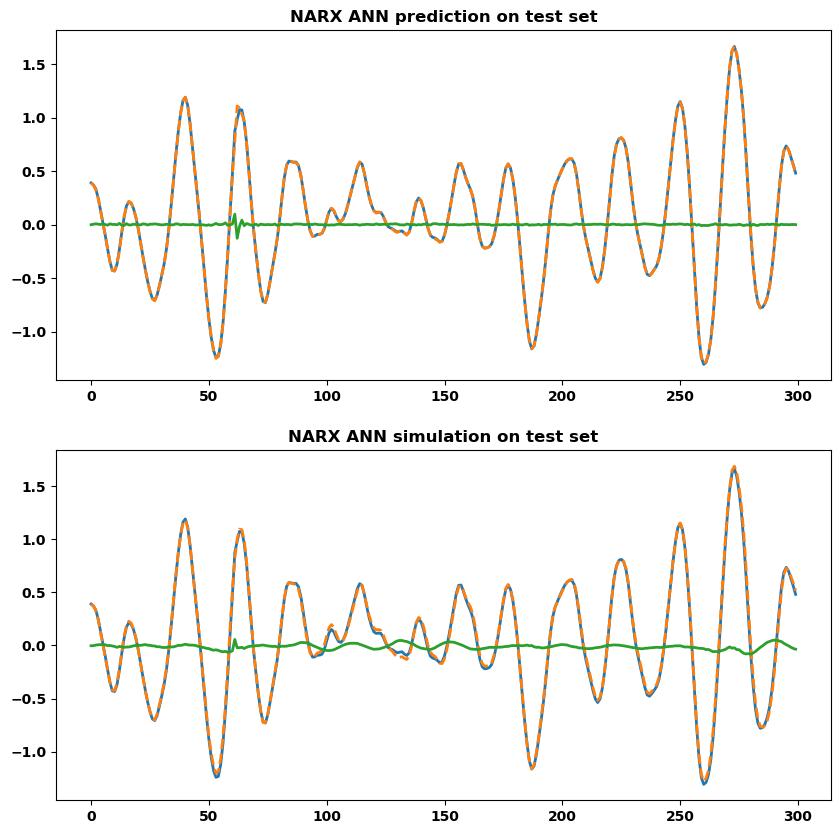

In [65]:
start=75000
end=start+300
sim_pred_offset=10
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('NARX ANN prediction on test set')
plt.xlabel('Theta [rad]')
plt.ylabel('Sample [n]')
plt.plot(y[start+sim_pred_offset:end+sim_pred_offset],lw=2)
plt.plot(y_pred[start+sim_pred_offset:end+sim_pred_offset],ls='--',lw=2)
plt.plot(y[start+sim_pred_offset:end+sim_pred_offset]-y_pred[start+sim_pred_offset:end+sim_pred_offset],lw=2)
plt.subplot(212)
plt.title('NARX ANN simulation on test set')
plt.xlabel('Theta [rad]')
plt.ylabel('Sample [n]')
plt.plot(y_data[0:300],lw=2)
plt.plot(y_sim[0:300],ls='--',lw=2)
plt.plot(y_data[0:300]-y_sim[0:300],lw=2)